In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('/kaggle/input/air-quality-and-health-impact-dataset/air_quality_health_impact_data.csv')
df

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5807,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,5808,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,5809,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,5810,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0


# Visualize distribution of Ozone(O3) levels

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


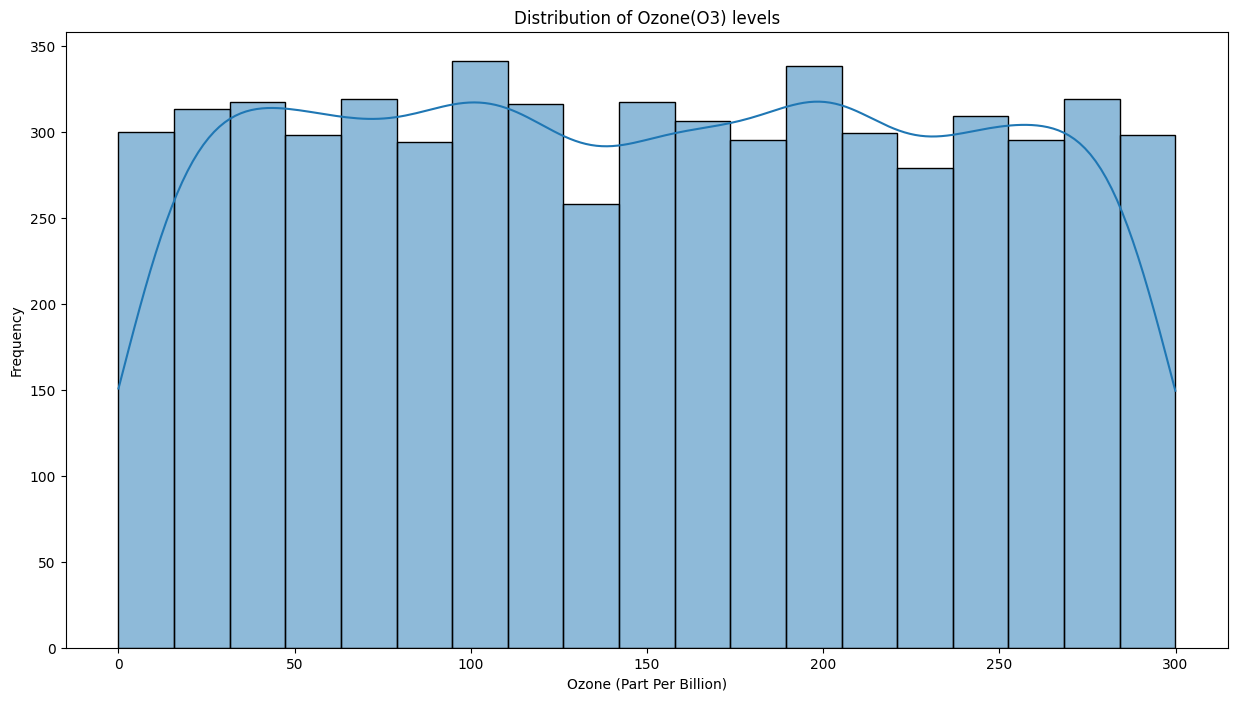

In [3]:
plt.figure(figsize=(15,8))
sns.histplot(df['O3'],kde=True)
plt.title('Distribution of Ozone(O3) levels')
plt.xlabel('Ozone (Part Per Billion)')
plt.ylabel('Frequency')
plt.show()

In [4]:
correlation_matrix=df.corr()
correlation_matrix

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
RecordID,1.000000,-0.003768,0.022260,0.022816,0.010694,-0.021524,-0.000874,0.004080,-0.001449,0.018529,-0.014545,-0.030537,-0.008299,0.015786,0.198229
AQI,-0.003768,1.000000,0.023127,0.005890,0.007836,-0.006644,0.002339,0.004185,-0.004217,-0.018816,0.009302,0.009158,-0.013592,0.614560,-0.348106
PM10,0.022260,0.023127,1.000000,-0.012193,0.008487,-0.007177,-0.004411,-0.017561,-0.017290,-0.018959,-0.001315,0.015582,-0.009076,0.182600,-0.108271
PM2_5,0.022816,0.005890,-0.012193,1.000000,0.005564,0.015894,0.006070,-0.001978,0.006720,0.009041,0.025244,0.017312,-0.023123,0.220347,-0.152407
NO2,0.010694,0.007836,0.008487,0.005564,1.000000,-0.019979,-0.014910,0.006971,-0.011100,-0.001398,0.019849,-0.005012,-0.002859,0.124435,-0.090387
SO2,-0.021524,-0.006644,-0.007177,0.015894,-0.019979,1.000000,-0.004319,-0.022458,0.000910,-0.001617,0.011130,-0.002672,-0.010546,0.015535,-0.008364
O3,-0.000874,0.002339,-0.004411,0.006070,-0.014910,-0.004319,1.000000,-0.001257,0.003982,-0.002596,-0.010068,0.001753,-0.014293,0.157940,-0.110093
Temperature,0.004080,0.004185,-0.017561,-0.001978,0.006971,-0.022458,-0.001257,1.000000,-0.000233,0.000887,0.009394,0.009249,0.007943,-0.010556,0.005969
Humidity,-0.001449,-0.004217,-0.017290,0.006720,-0.011100,0.000910,0.003982,-0.000233,1.000000,0.021027,0.008691,-0.024617,-0.004865,0.000662,-0.006715
WindSpeed,0.018529,-0.018816,-0.018959,0.009041,-0.001398,-0.001617,-0.002596,0.000887,0.021027,1.000000,-0.010553,0.003715,-0.006454,-0.025447,0.005999


# Visualize correlation matrix as heatmap

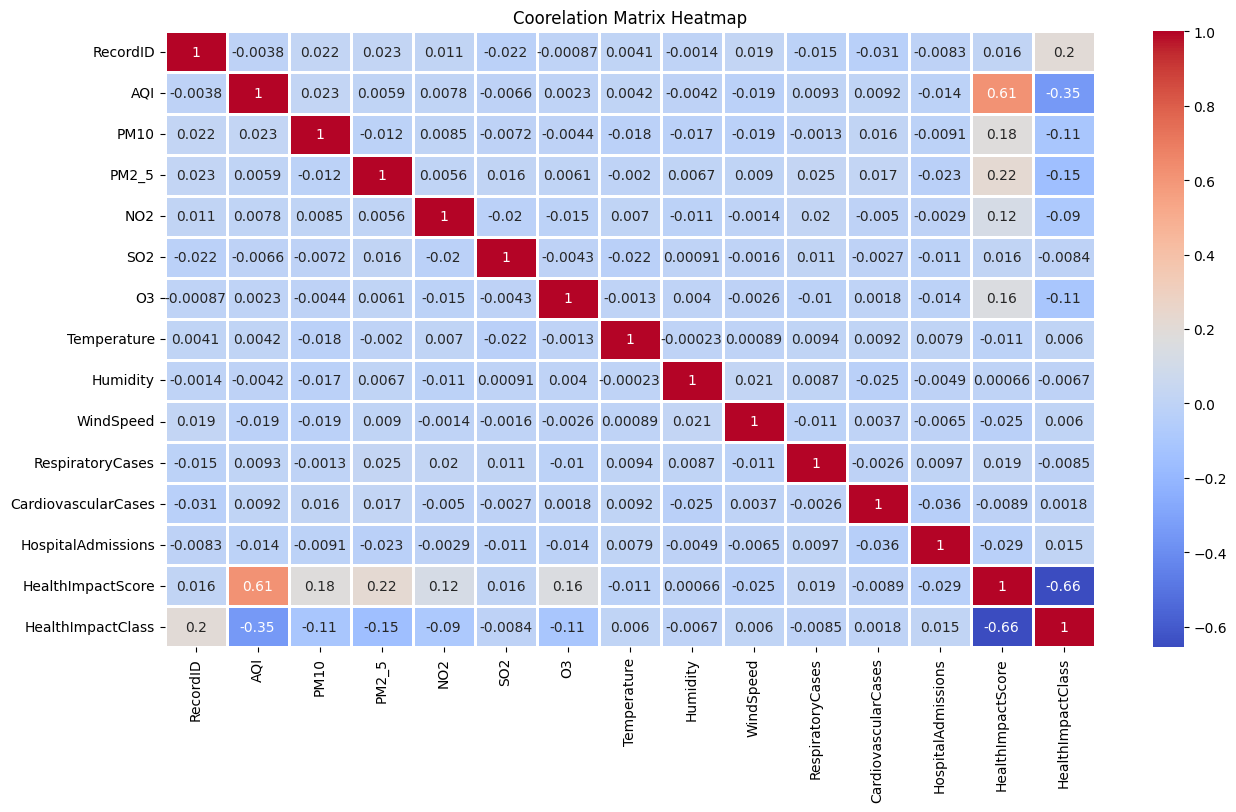

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=1)
plt.title('Coorelation Matrix Heatmap')
plt.show()

# Variables Vs Ozone(O3)

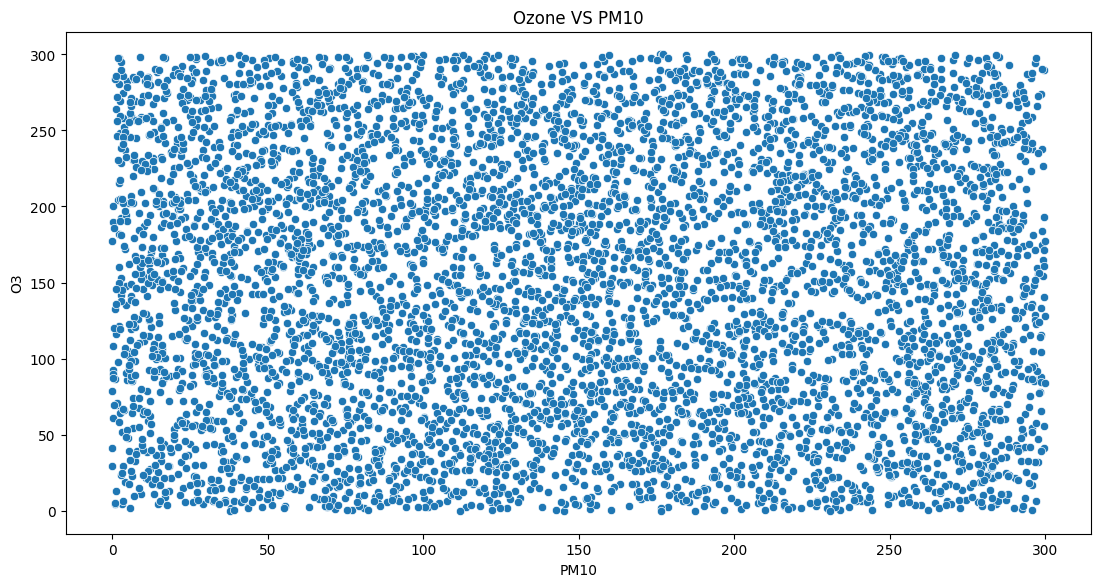

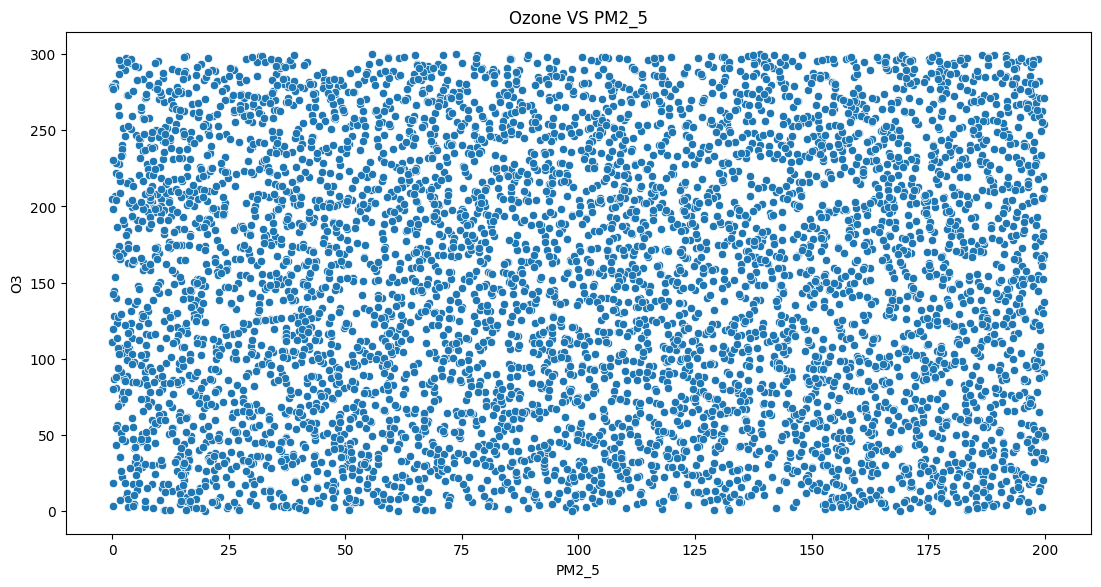

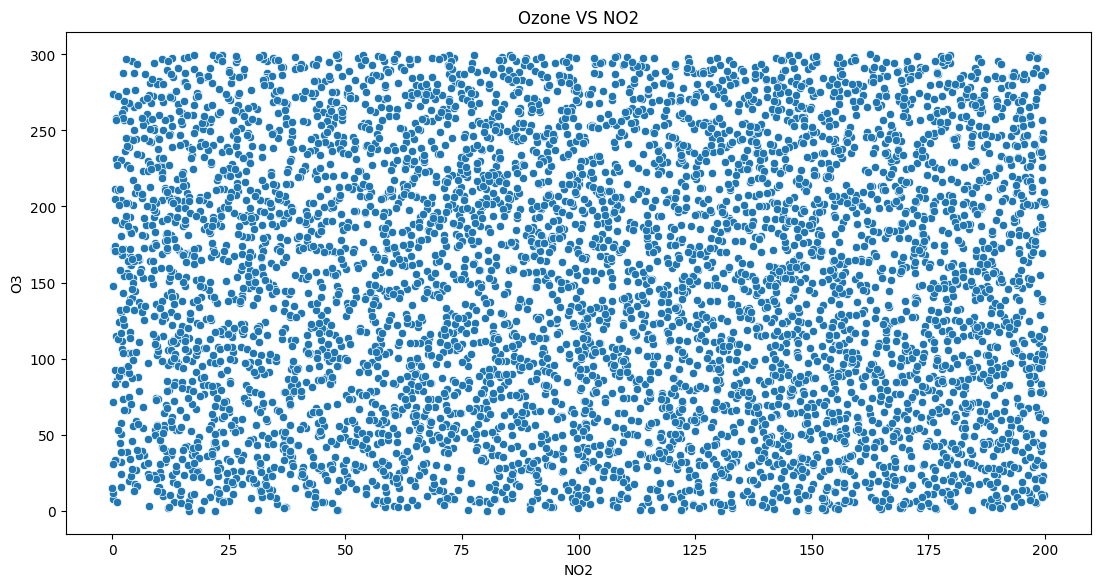

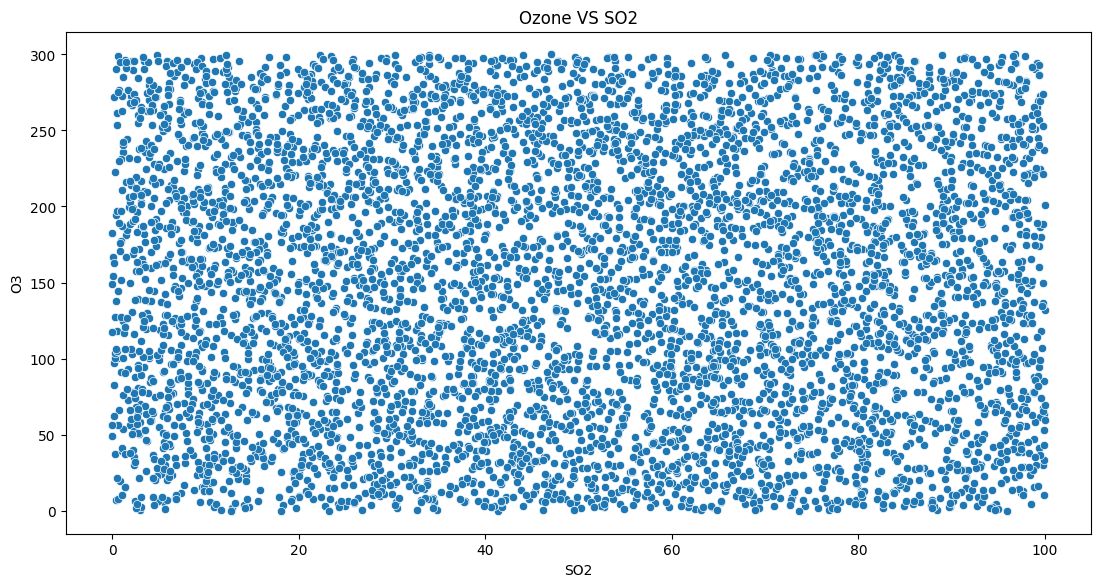

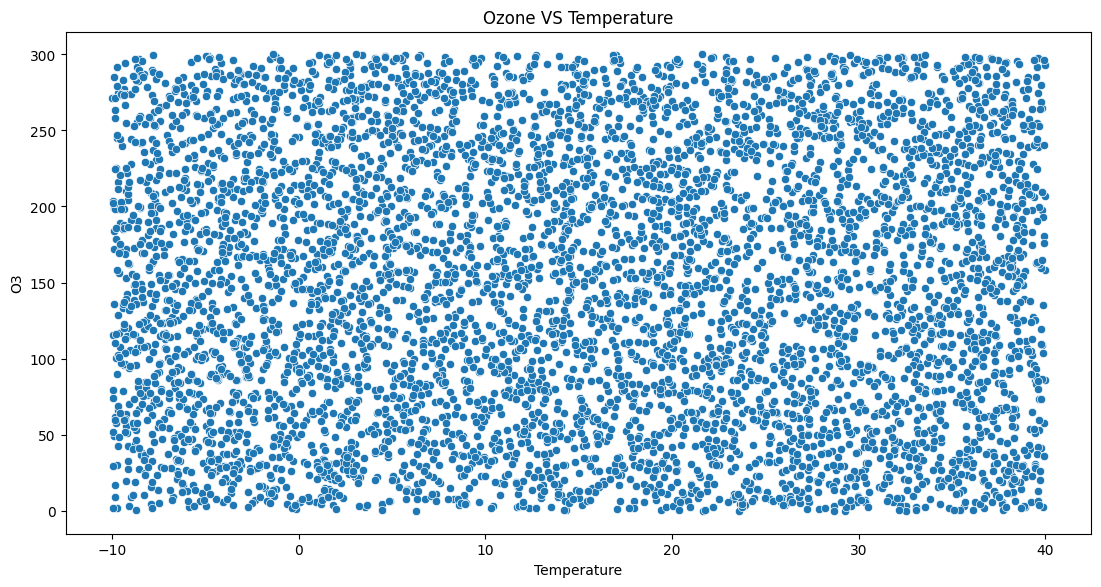

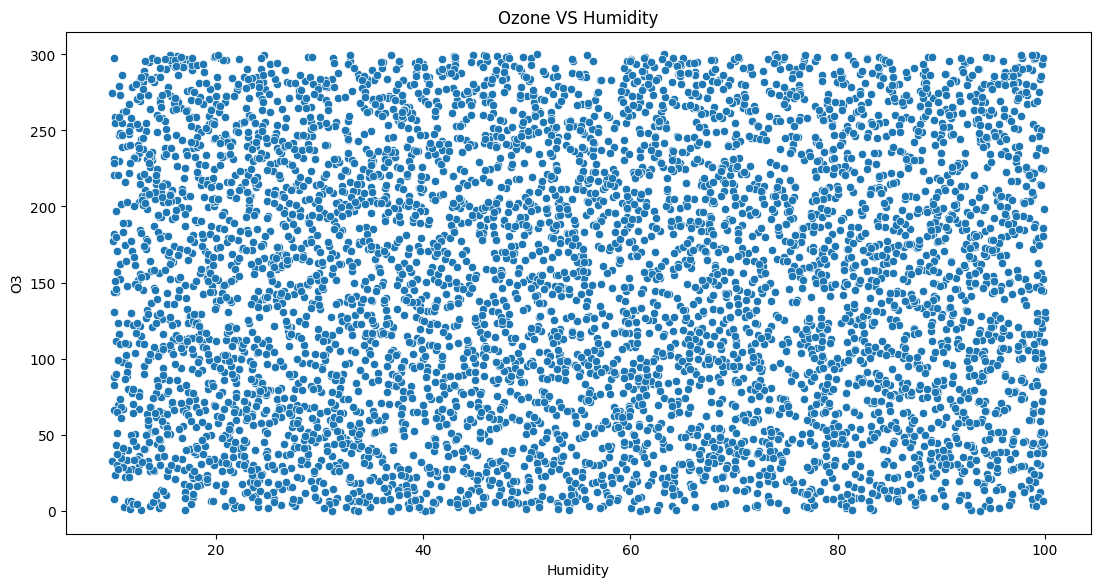

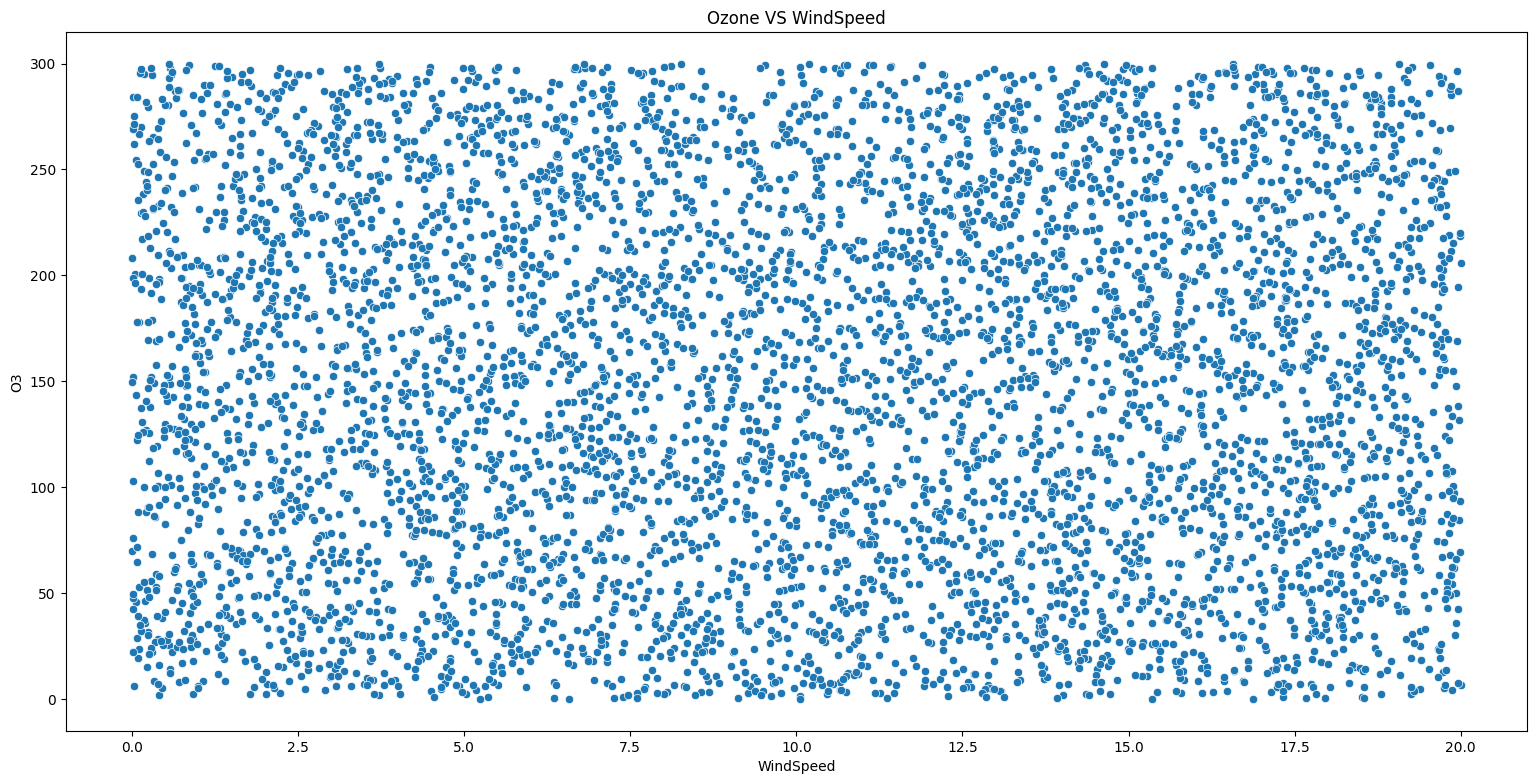

In [6]:
variables=['PM10','PM2_5','NO2','SO2','Temperature','Humidity','WindSpeed']
for i, Variable in enumerate(variables):
    plt.figure(figsize=(45, 30))
    plt.subplot(4,3,i+1)
    sns.scatterplot(x=df[Variable],y=df['O3'])
    plt.title(f'Ozone VS {Variable}')
    plt.xlabel(Variable)
    plt.ylabel('O3')
    
plt.tight_layout()
plt.show()

# Testing And Traning Sets

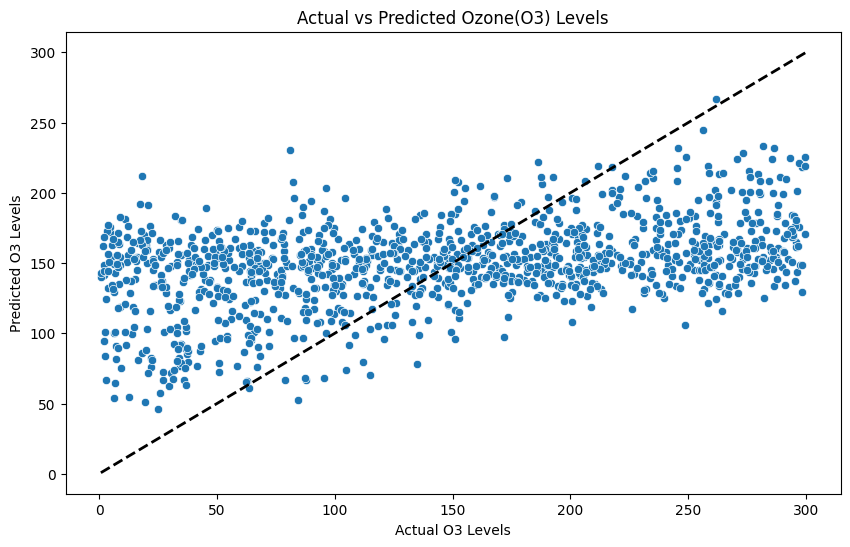

In [7]:
X = df.drop(columns=['O3'])  
y = df['O3']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

complex_model = RandomForestRegressor(random_state=70)
complex_model.fit(X_train, y_train)

y_pred_complex = complex_model.predict(X_test)

mse_complex = mean_squared_error(y_test, y_pred_complex)
r2_complex = r2_score(y_test, y_pred_complex)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_complex)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Ozone(O3) Levels')
plt.xlabel('Actual O3 Levels')
plt.ylabel('Predicted O3 Levels')
plt.show()